## Dog Breed Classification

<b>Introduction:</b>
<br>
In this project, we aim to develop a classification model to identify the breeds of dogs from images. We will follow a two-fold approach: first, implementing a custom convolutional neural network (CNN) architecture, and second, utilizing pre-trained models such as VGG and ResNet. The objective is to compare the performance of these approaches and draw meaningful insights from the results.

<b>Dataset:</b><br>
The original data is from <a href='http://vision.stanford.edu/aditya86/ImageNetDogs/'>Stanford</a>, and it contains images of many dog breeds. In this project, however, we'll use a <a href='https://drive.google.com/uc?export=download&id=1sj62C-9WKD09-8iYSeEvXmAGQoY2oFFQ'>reduced dataset</a> containing only five breeds. If you want to extend your analysis, feel free to use the original dataset. 

### Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tensorflow import keras
from keras import layers, applications
from keras.models import Sequential, Model

In [2]:
tf.random.set_seed(42)

### Load and view dataset

In [18]:
breeds = ['beagle', 'bernese_mountain_dog', 'doberman', 'labrador_retriever', 'siberian_husky']

args = {
    'labels': 'inferred',
    'label_mode': 'categorical',
    'batch_size': 32,
    'image_size': (256, 256),
    'seed': 1,
    'validation_split': 0.2,
    'class_names': breeds
}

In [19]:
train = tf.keras.utils.image_dataset_from_directory(
    'images',
    subset='training',
    **args
)

test = tf.keras.utils.image_dataset_from_directory(
    'images',
    subset='validation',
    **args
)

Found 926 files belonging to 5 classes.
Using 741 files for training.
Found 926 files belonging to 5 classes.
Using 185 files for validation.


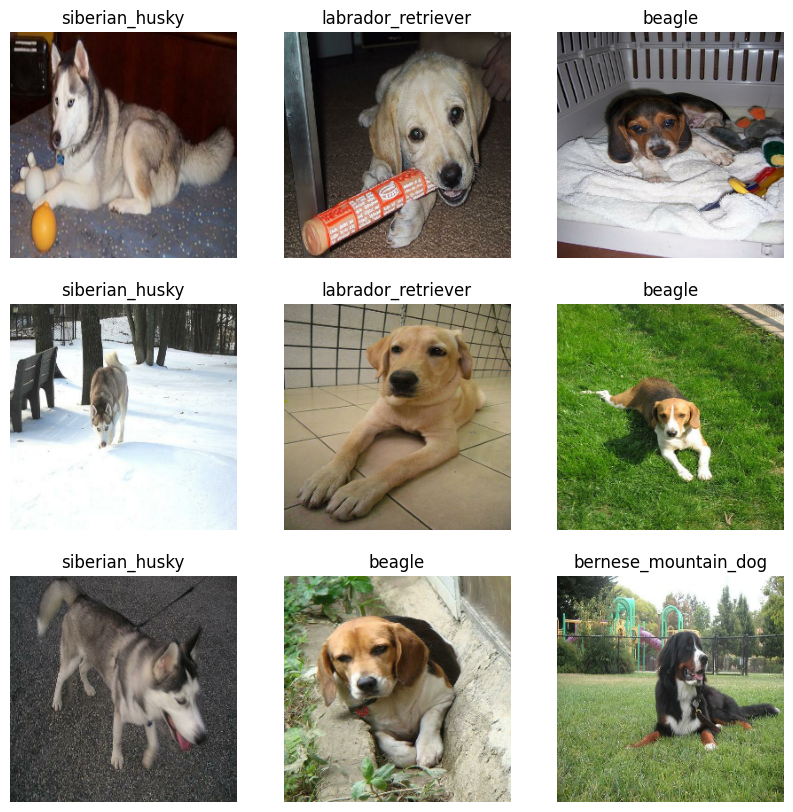

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(breeds[np.where(labels[i].numpy() == 1)[0][0]])
        plt.axis("off")

### Custom CNN Architecture

In [6]:
my_model = Sequential([
    tf.keras.layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256, 256, 3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(breeds))
])

In [7]:
my_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

my_history = my_model.fit(
    train,
    validation_data=test,
    epochs=10,
    verbose=1
)

Epoch 1/10


24/24 [==============================] - 3s 74ms/step - loss: 64.5298 - accuracy: 0.2402 - val_loss: 8.0303 - val_accuracy: 0.1946
Epoch 2/10
24/24 [==============================] - 2s 69ms/step - loss: 3.6435 - accuracy: 0.3846 - val_loss: 2.3097 - val_accuracy: 0.3297
Epoch 3/10
24/24 [==============================] - 2s 68ms/step - loss: 1.1430 - accuracy: 0.5695 - val_loss: 1.8431 - val_accuracy: 0.3027
Epoch 4/10
24/24 [==============================] - 2s 69ms/step - loss: 0.5770 - accuracy: 0.8340 - val_loss: 1.8702 - val_accuracy: 0.3243
Epoch 5/10
24/24 [==============================] - 2s 86ms/step - loss: 0.2101 - accuracy: 0.9636 - val_loss: 1.9948 - val_accuracy: 0.3351
Epoch 6/10
24/24 [==============================] - 2s 95ms/step - loss: 0.0544 - accuracy: 0.9946 - val_loss: 2.3026 - val_accuracy: 0.3027
Epoch 7/10
24/24 [==============================] - 2s 91ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 2.5187 - val_accuracy: 0.3405
Epoch 8/10
24/24 [=====

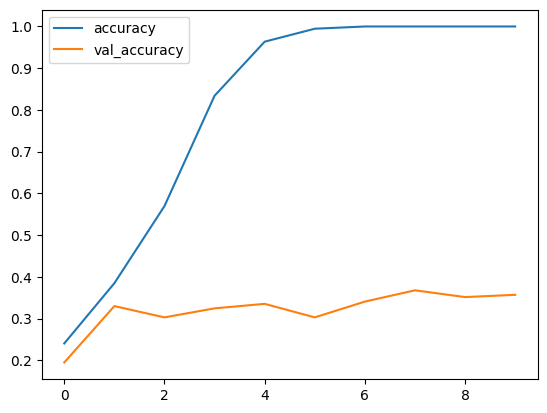

In [8]:
my_history_df = pd.DataFrame.from_dict(my_history.history)
my_history_df[['accuracy', 'val_accuracy']].plot()
plt.show()

### VGG16

In [9]:
vgg16 = tf.keras.applications.VGG16(weights = 'imagenet', include_top = False, input_shape= (256, 256, 3))

for layer in vgg16.layers:
    layer.trainable = False

last_layer = vgg16.layers[-1]

x = layers.Flatten()(last_layer.output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)  

x = layers.Dense(units=len(breeds), activation='softmax')(x)

model_vgg = Model(vgg16.input, x, name='VGG16')
model_vgg.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [10]:
model_vgg.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )

history_vgg = model_vgg.fit(
    train,
    validation_data=test,
    epochs=10,
    verbose=1
)

Epoch 1/10
24/24 [==============================] - 8s 274ms/step - loss: 13.0785 - accuracy: 0.5277 - val_loss: 1.4354 - val_accuracy: 0.6054
Epoch 2/10
24/24 [==============================] - 5s 210ms/step - loss: 1.2744 - accuracy: 0.6896 - val_loss: 1.4011 - val_accuracy: 0.5730
Epoch 3/10
24/24 [==============================] - 5s 207ms/step - loss: 0.8716 - accuracy: 0.7220 - val_loss: 1.1712 - val_accuracy: 0.6108
Epoch 4/10
24/24 [==============================] - 5s 206ms/step - loss: 0.7495 - accuracy: 0.7490 - val_loss: 1.4766 - val_accuracy: 0.5946
Epoch 5/10
24/24 [==============================] - 5s 206ms/step - loss: 0.8644 - accuracy: 0.7922 - val_loss: 1.3188 - val_accuracy: 0.6000
Epoch 6/10
24/24 [==============================] - 5s 207ms/step - loss: 0.6770 - accuracy: 0.7557 - val_loss: 1.1215 - val_accuracy: 0.5676
Epoch 7/10
24/24 [==============================] - 5s 207ms/step - loss: 0.5432 - accuracy: 0.8070 - val_loss: 1.1722 - val_accuracy: 0.6486
Epoch

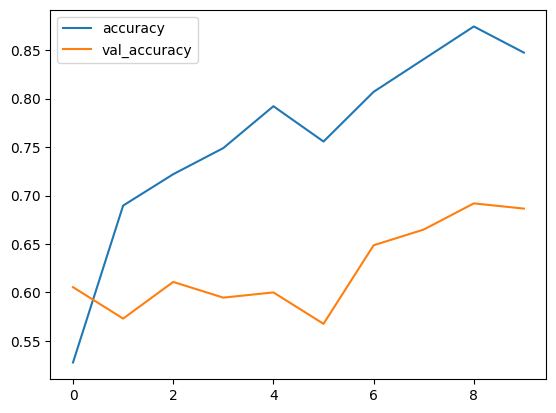

In [11]:
vgg_history_df = pd.DataFrame.from_dict(history_vgg.history)
vgg_history_df[['accuracy', 'val_accuracy']].plot()
plt.show()

### ResNet50

In [12]:
resnet50 = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape= (256, 256, 3))

for layer in resnet50.layers:
    layer.trainable = False

last_layer = resnet50.layers[-1]

x = layers.Flatten()(last_layer.output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)  

x = layers.Dense(units=len(breeds), activation='softmax')(x)

model_res = Model(resnet50.input, x, name='ResNet50')
model_res.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [13]:
model_res.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )

history_res = model_res.fit(
    train,
    validation_data=test,
    epochs=10,
    verbose=1
)

Epoch 1/10
24/24 [==============================] - 6s 176ms/step - loss: 6.0141 - accuracy: 0.6451 - val_loss: 1.1770 - val_accuracy: 0.7243
Epoch 2/10
24/24 [==============================] - 3s 128ms/step - loss: 0.9228 - accuracy: 0.7719 - val_loss: 1.0944 - val_accuracy: 0.6432
Epoch 3/10
24/24 [==============================] - 3s 128ms/step - loss: 0.6331 - accuracy: 0.7584 - val_loss: 0.7561 - val_accuracy: 0.7622
Epoch 4/10
24/24 [==============================] - 3s 129ms/step - loss: 0.4555 - accuracy: 0.8785 - val_loss: 0.9678 - val_accuracy: 0.7568
Epoch 5/10
24/24 [==============================] - 3s 128ms/step - loss: 0.2888 - accuracy: 0.9096 - val_loss: 0.7744 - val_accuracy: 0.7946
Epoch 6/10
24/24 [==============================] - 3s 129ms/step - loss: 0.3481 - accuracy: 0.9109 - val_loss: 0.7527 - val_accuracy: 0.8162
Epoch 7/10
24/24 [==============================] - 3s 129ms/step - loss: 0.1823 - accuracy: 0.9379 - val_loss: 1.0829 - val_accuracy: 0.8054
Epoch 

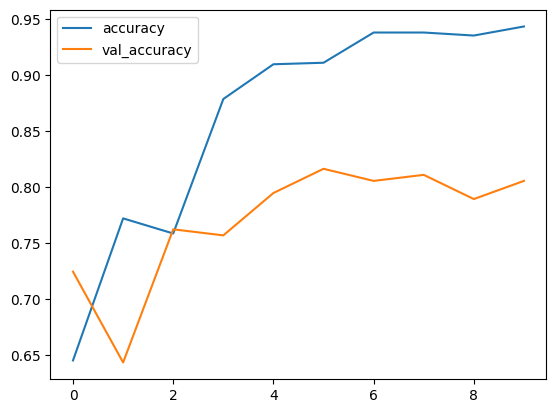

In [14]:
res_history_df = pd.DataFrame.from_dict(history_res.history)
res_history_df[['accuracy', 'val_accuracy']].plot()
plt.show()

### Conclusion

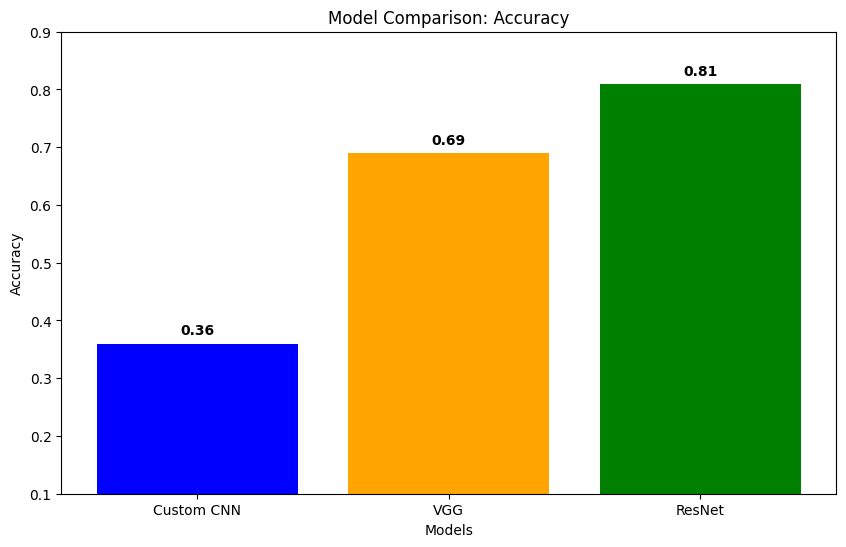

In [59]:
res_history_df.loc[len(res_history_df)-1, 'accuracy']

models = ['Custom CNN', 'VGG', 'ResNet']

accuracy = [
    round(my_history_df.loc[len(res_history_df)-1, 'val_accuracy'], 2),
    round(vgg_history_df.loc[len(res_history_df)-1, 'val_accuracy'], 2),
    round(res_history_df.loc[len(res_history_df)-1, 'val_accuracy'], 2),
]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.ylim(0.1, 0.9)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold')

plt.show()